# 1.Importation des librairies

In [55]:
# 1. Importation des librairies

In [56]:
import numpy as np

In [57]:
import pandas as pd

# 2. Chargement des données

In [58]:
# Chargement des données

In [59]:
data = pd.read_csv('Data/studentscores.csv')

In [60]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3.Analyse des données

In [61]:
# 3.Analyse des données

In [62]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [64]:
data['Hours'].max()

np.float64(9.2)

In [65]:
data['Hours'].min()

np.float64(1.1)

In [66]:
print(data['Hours'].max())

9.2


In [67]:
print(data['Scores'].max())

95


In [68]:
print("Max Scores : ",data['Scores'].max())

Max Scores :  95


In [69]:
print("Min Scores : ",data['Scores'].min())

Min Scores :  17


# 4.Division des données

## Variables indep et dep

In [70]:
x = data.iloc[: , :-1].values
y =data.iloc[: , -1].values

In [71]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [72]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

## 4.1 Separation des données : Train et Test

In [73]:
#X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.25, random_state=40)

In [75]:
print("x_train Shape :", x_train.shape)
print("x_test Shape :", x_test.shape)
print("y_train Shape :", y_train.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (18, 1)
x_test Shape : (7, 1)
y_train Shape : (18,)
y_test Shape : (7,)


# 5.Construire un modele

In [76]:
# Importer l'algorithme de le regression lineaire
from sklearn.linear_model import LinearRegression

In [77]:
modele_lineaire = LinearRegression() 

In [78]:
#Entrainement du modele
modele_lineaire.fit(x_train, y_train)

LinearRegression()

In [79]:
#Faire la prediction
y_scores_predicts = modele_lineaire.predict(x_test)

In [80]:
y_scores_predicts

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [81]:
y_test

array([95, 86, 17, 69, 42, 75, 54])

In [120]:
resultats = pd.DataFrame(y_test, y_scores_predicts)

In [121]:
resultats

,y-score-reel,y-score-predits
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [84]:
#Evaluation du modele
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
print("MSE de la progression Lineaire :", mean_squared_error(
    y_test, y_scores_predicts)
)

MSE de la progression Lineaire : 51.90159659147337


In [86]:
print("R2 score de la regression lineaire :", r2_score(
  y_test, y_scores_predicts)  
)

R2 score de la regression lineaire : 0.9168569951293908


# 6.Visualisation de Resultats

In [87]:
import matplotlib.pyplot as plt

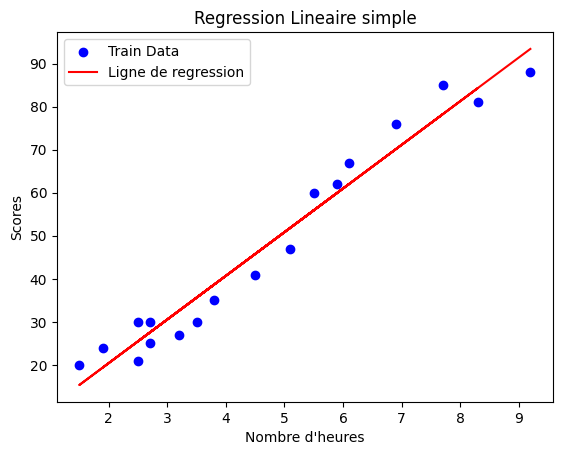

In [116]:
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_train, modele_lineaire.predict(x_train), color='Red', label='Ligne de regression')
plt.xlabel("Nombre d'heures")
plt.ylabel("Scores")
plt.title("Regression Lineaire simple")
plt.legend()
plt.show()

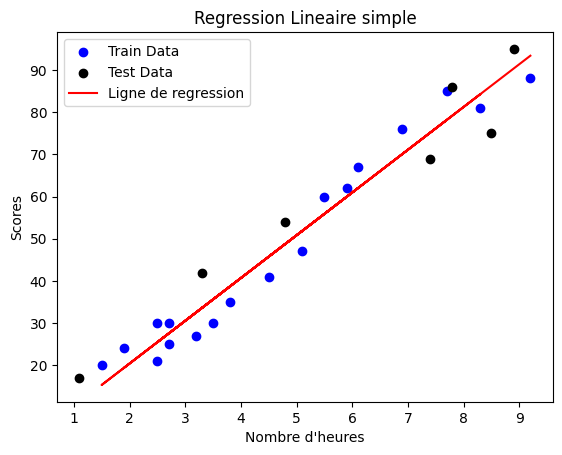

In [114]:
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='black', label='Test Data')
plt.plot(x_train, modele_lineaire.predict(x_train), color='Red', label='Ligne de regression')
plt.xlabel("Nombre d'heures")
plt.ylabel("Scores")
plt.title("Regression Lineaire simple")
plt.legend()
plt.show()

# 7.Prediction simple

In [93]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [118]:
resultats = pd.DataFrame({"y-score-reel": y_test, "y-score-predits": y_scores_predicts})
resultats

,y-score-reel,y-score-predits
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [110]:
y_scores_predicts

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [111]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [112]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


In [119]:
resultats = pd.DataFrame({"y-score-reel": y_test, "y-scores-predits": y_scores_predicts})
resultats["difference"] = resultats["y-score-reel"] - resultats["y-scores-predits"]
print(resultats)


   y-score-reel  y-scores-predits  difference
0            95         90.348621    4.651379
1            86         79.201258    6.798742
2            17         11.303688    5.696312
3            69         75.147672   -6.147672
4            42         33.598413    8.401587
5            75         86.295034  -11.295034
6            54         48.799361    5.200639
